<a href="https://colab.research.google.com/github/anirbanpranto/airbnb-analysis/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
mypath = '/content/drive/MyDrive/Dataset/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['Switzerland.csv',
 'Greece.csv',
 'Vatican-City.csv',
 'Belgium.csv',
 'Austria.csv',
 'Netherland.csv',
 'Denmark.csv',
 'Germany.csv',
 'Italy.csv',
 'Spain.csv',
 'France.csv',
 'Encoded1.csv']

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Dataset/Belgium.csv', sep=";")
df2 = pd.read_csv('/content/drive/MyDrive/Dataset/Germany.csv', sep=";")
df3 = pd.read_csv('/content/drive/MyDrive/Dataset/Italy.csv', sep=";")
df4 = pd.read_csv('/content/drive/MyDrive/Dataset/Vatican-City.csv', sep=";")
df5 = pd.read_csv('/content/drive/MyDrive/Dataset/Netherland.csv', sep=";")
df6 = pd.read_csv('/content/drive/MyDrive/Dataset/Spain.csv', sep=";")
df7 = pd.read_csv('/content/drive/MyDrive/Dataset/Switzerland.csv', sep=";")
df8 = pd.read_csv('/content/drive/MyDrive/Dataset/Denmark.csv', sep=";")
df9 = pd.read_csv('/content/drive/MyDrive/Dataset/France.csv', sep=";")
df10 = pd.read_csv('/content/drive/MyDrive/Dataset/Austria.csv', sep=";")
df11 = pd.read_csv('/content/drive/MyDrive/Dataset/Greece.csv', sep=";")
dataframe = dataframe.append(df2)
dataframe = dataframe.append(df3)
dataframe = dataframe.append(df4)
dataframe = dataframe.append(df5)
dataframe = dataframe.append(df6)
dataframe = dataframe.append(df7)
dataframe = dataframe.append(df8)
dataframe = dataframe.append(df9)
dataframe = dataframe.append(df10)
dataframe = dataframe.append(df11)
dataframe.tail(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,40,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
5122,16132209,https://www.airbnb.com/rooms/16132209,20170509084221,2017-05-09,Your Stylish home at Acropolis,A stylish modern apartment at the heart of Ath...,A stylish modern apartment at the heart of Ath...,A stylish modern apartment at the heart of Ath...,none,The neighborhood is really vibrant. Plenty of ...,IMPORTANT LEGAL NOTICE By making this reservat...,The flat is ideally located for coming/going f...,Guests can enjoy the privacy of the whole apar...,The whole apartment is at the guest disposal f...,NaN,https://a0.muscache.com/im/pictures/65673933-a...,https://a0.muscache.com/im/pictures/65673933-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/65673933-a...,104363322,https://www.airbnb.com/users/show/104363322,Sotiris,2016-11-19,"Athens, Attica region, Greece",I must confess I’m Greek(I know… nobody’s per...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/e8fad98b-9...,https://a0.muscache.com/im/pictures/e8fad98b-9...,Pangrati,3.0,3.0,"email,phone,google,reviews,jumio,offline_gover...","Athina, 117 42, Greece",NaN,ΝΕΟΣ ΚΟΣΜΟΣ,NaN,Athina,NaN,...,5,1.0,1.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,55.0,NaN,NaN,NaN,12.0,2,10.0,2,1125,today,NaN,10,32,59,334,2017-05-09,13,2017-01-08,2017-04-23,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,3,3.20,"37.9661594207,23.7292671761","Host Is Superhost,Host Has Profile Pic,Host Id..."
5123,13214044,https://www.airbnb.com/rooms/13214044,20170509084221,2017-05-09,A tiny comfortable apartment close to nightlife,As a single traveller or not you'll love this ...,NaN,As a single traveller or not you'll love this ...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/a8e4c240-e...,https://a0.muscache.com/im/pictures/a8e4c240-e...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/a8e4c240-e...,74096946,https://www.airbnb.com/users/show/74096946,Vasilis,2016-05-26,"Athens, Attica, Greece",Hi! I am a personal zumba trainer. I love to d...,within a day,100.0,NaN,https://a0.muscache.com/im/pictures/f3035750-e...,https://a0.muscache.com/im/pictures/f3035750-e...,NaN,1.0,1.0,"email,phone,reviews","Athina, 117 45, Greece",NaN,ΝΕΟΣ ΚΟΣΜΟΣ,NaN,Athina,NaN,...,3,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,24.0,NaN,NaN,NaN,10.0,2,10.0,1,1125,6 weeks ago,NaN,26,56,86,86,2017-05-09,15,2016-07-17,2017-04-03,96.0,10.0,9.0,10.0,10.0,9.0,10.0,NaN,NaN,flexible,1,1.52,"37.9576555138,23.7197848739","Host Has Profile Pic,Is Location Exact"
5124,17915847,https://www.airbnb.com/rooms/17915847,20170509084221,2017-05-09,6th Floor flat with Acropolis view,Amazing apartment with amazing view of Acropol...,"The apartments has 2 bedrooms, one with a doub...",Amazing apartment with amazing view of Ac

In [ ]:
#regression scikit learn and xgboost
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
df = pd.DataFrame.copy(dataframe)
df.shape

(214676, 89)

In [ ]:
#check effective features
(df.isnull().sum() / len(df)).sort_values(ascending=False)[:30]

Has Availability               0.991
Host Acceptance Rate           0.985
License                        0.979
Square Feet                    0.964
Monthly Price                  0.810
Weekly Price                   0.784
Neighbourhood Group Cleansed   0.732
Jurisdiction Names             0.673
Notes                          0.626
Security Deposit               0.596
Interaction                    0.497
Access                         0.478
Host About                     0.425
Neighborhood Overview          0.424
House Rules                    0.412
Transit                        0.400
Cleaning Fee                   0.391
Neighbourhood                  0.340
Space                          0.297
Host Neighbourhood             0.290
Review Scores Value            0.249
Review Scores Checkin          0.249
Review Scores Location         0.249
Review Scores Accuracy         0.248
Review Scores Communication    0.248
Review Scores Cleanliness      0.248
Review Scores Rating           0.247
L

In [ ]:
#drop columns that have over 40% missing data and data that would be unique majority of the times [url, human written data ]
df.drop(['Has Availability', 'Square Feet', 'Host Acceptance Rate', 'License', 'Host URL', 'Neighborhood Overview', 'First Review', 'Last Review',  'Calendar last Scraped', 'Calendar Updated',  'Host Since', 'Host Name' ,'Transit', 'Description', 'Monthly Price', 'Weekly Price', 'Neighbourhood Group Cleansed', 'ID', 'Jurisdiction Names', 'Notes', 'Security Deposit', 'Name', 'Summary', 'Space', 'Scrape ID', 'Last Scraped', 'Scrape ID', 'Interaction', 'Access', 'Host About', 'House Rules', 'Host ID', 'XL Picture Url', 'Host Picture Url', 'Host Thumbnail Url', 'Medium Url', 'Thumbnail Url', 'Picture Url', 'Listing Url' ], axis=1, inplace=True)

In [ ]:
df.head(5)

,Experiences Offered,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,none,"Brussels, Brussels, Belgium",within an hour,97.000,Etterbeek,4.000,4.000,"email,phone,reviews","Woluwe-Saint-Lambert, Woluwe-Saint-Lambert, Br...",Woluwe-Saint-Lambert,Woluwe-Saint-Lambert,Woluwe-Saint-Lambert,Bruxelles,1200,Brussels,"Woluwe-Saint-Lambert, Belgium",BE,Belgium,50.842,4.411,Guesthouse,Private room,2,1.000,1.000,1.000,Real Bed,"Wireless Internet,Kitchen,Essentials,Lock on b...",26.000,nan,1,15.000,3,1125,4,34,64,339,1,100.000,8.000,8.000,10.000,10.000,10.000,10.000,flexible,2,1.000,"50.8420350715,4.41090932995","Host Has Profile Pic,Is Location Exact,Instant..."
1,none,"Brussels, Brussels, Belgium",within an hour,100.000,Woluwe-Saint-Pierre,1.000,1.000,"email,phone,google,reviews","Woluwe-Saint-Pierre, Woluwe-Saint-Pierre, Brux...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Bruxelles,1150,Brussels,"Woluwe-Saint-Pierre, Belgium",BE,Belgium,50.827,4.409,Apartment,Entire home/apt,2,1.000,1.000,1.000,Real Bed,"Internet,Wireless Internet,Kitchen,Heating,Was...",75.000,nan,1,0.000,2,1125,30,60,90,91,7,91.000,9.000,9.000,9.000,9.000,9.000,9.000,strict,1,1.180,"50.8273288084,4.4091058532","Host Has Profile Pic,Is Location Exact"
2,none,"Brussels, Bruxelles, Belgium",within an hour,100.000,Woluwe-Saint-Pierre,1.000,1.000,"email,phone,facebook","Woluwe-Saint-Pierre, bruxelles, woluwe saint p...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,bruxelles,woluwe saint pierre,1150,Brussels,"bruxelles, Belgium",BE,Belgium,50.827,4.462,House,Entire home/apt,4,1.000,2.000,2.000,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Free par...",110.000,nan,1,0.000,2,1125,23,46,46,46,0,nan,nan,nan,nan,nan,nan,nan,flexible,1,nan,"50.8271566625,4.46172051163","Host Has Profile Pic,Is Location Exact"
3,none,"Woluwe-Saint-Pierre, Brussels, Belgium",NaN,nan,Woluwe-Saint-Pierre,1.000,1.000,"email,phone,reviews","Woluwe-Saint-Pierre, Woluwe-Saint-Pierre, Brux...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Bruxelles,1150,Upper Normandy,"Woluwe-Saint-Pierre, Belgium",BE,Belgium,50.833,4.441,Apartment,Entire home/apt,2,1.500,1.000,1.000,Real Bed,"TV,Internet,Kitchen,Buzzer/wireless intercom,H...",60.000,nan,1,0.000,2,1125,5,5,5,5,4,100.000,10.000,10.000,10.000,10.000,10.000,10.000,flexible,1,0.380,"50.8326872333,4.44063251737","Host Has Profile Pic,Is Location Exact"
4,none,"City of Brussels, Brussels, Belgium",within a day,100.000,Woluwe-Saint-Pierre,2.000,2.000,"email,phone,jumio,offline_government_id,govern...","Woluwe-Saint-Pierre, Woluwe-Saint-Pierre, Brux...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Bruxelles,1150,Brussels,"Woluwe-Saint-Pierre, Belgium",BE,Belgium,50.834,4.413,Apartment,Private room,2,1.000,1.000,1.000,Real Bed,"TV,Cable TV,Wireless Internet,Kitchen,Free par...",55.000,20.000,1,10.000,5,9,15,45,75,350,0,nan,nan,nan,nan,nan,nan,nan,flexible,2,nan,"50.8341737391,4.41283468326","Host Has Profile Pic,Is Location Exact"


In [ ]:
#we need to predict the price, and rating. Since they have missing values we'll need to impute those
categorical = list(df.select_dtypes(include=['object']).columns.values)
from sklearn.impute import SimpleImputer
df['Features'] = df['Features'].str.lower()
df['Amenities'] = df['Amenities'].str.lower()
df['Host Verifications'] = df['Host Verifications'].str.lower()
# imp = SimpleImputer(strategy='most_frequent')
# new_data = pd.DataFrame(imp.fit_transform(df))
df = pd.concat([df.drop('Features', 1), df['Features'].str.get_dummies(sep=",")], 1)
df = pd.concat([df.drop('Amenities', 1), df['Amenities'].str.get_dummies(sep=",")], 1)
df = pd.concat([df.drop('Host Verifications', 1), df['Host Verifications'].str.get_dummies(sep=",")], 1)
df.head(5)

,Experiences Offered,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,...,step-free access,stove,suitable for events,table corner guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,tub with shower bench,tv,washer,washer / dryer,waterfront,wheelchair accessible,wide clearance to bed,wide clearance to shower and toilet,wide doorway,wide hallway clearance,window guards,wireless internet,amex,email,facebook,google,government_id,identity_manual,jumio,kba,linkedin,manual_offline,manual_online,none,offline_government_id,phone,photographer,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email
0,none,"Brussels, Brussels, Belgium",within an hour,97.000,Etterbeek,4.000,4.000,"Woluwe-Saint-Lambert, Woluwe-Saint-Lambert, Br...",Woluwe-Saint-Lambert,Woluwe-Saint-Lambert,Woluwe-Saint-Lambert,Bruxelles,1200,Brussels,"Woluwe-Saint-Lambert, Belgium",BE,Belgium,50.842,4.411,Guesthouse,Private room,2,1.000,1.000,1.000,Real Bed,26.000,nan,1,15.000,3,1125,4,34,64,339,1,100.000,8.000,8.000,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,none,"Brussels, Brussels, Belgium",within an hour,100.000,Woluwe-Saint-Pierre,1.000,1.000,"Woluwe-Saint-Pierre, Woluwe-Saint-Pierre, Brux...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Bruxelles,1150,Brussels,"Woluwe-Saint-Pierre, Belgium",BE,Belgium,50.827,4.409,Apartment,Entire home/apt,2,1.000,1.000,1.000,Real Bed,75.000,nan,1,0.000,2,1125,30,60,90,91,7,91.000,9.000,9.000,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,none,"Brussels, Bruxelles, Belgium",within an hour,100.000,Woluwe-Saint-Pierre,1.000,1.000,"Woluwe-Saint-Pierre, bruxelles, woluwe saint p...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,bruxelles,woluwe saint pierre,1150,Brussels,"bruxelles, Belgium",BE,Belgium,50.827,4.462,House,Entire home/apt,4,1.000,2.000,2.000,Real Bed,110.000,nan,1,0.000,2,1125,23,46,46,46,0,nan,nan,nan,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,none,"Woluwe-Saint-Pierre, Brussels, Belgium",NaN,nan,Woluwe-Saint-Pierre,1.000,1.000,"Woluwe-Saint-Pierre, Woluwe-Saint-Pierre, Brux...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Bruxelles,1150,Upper Normandy,"Woluwe-Saint-Pierre, Belgium",BE,Belgium,50.833,4.441,Apartment,Entire home/apt,2,1.500,1.000,1.000,Real Bed,60.000,nan,1,0.000,2,1125,5,5,5,5,4,100.000,10.000,10.000,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,none,"City of Brussels, Brussels, Belgium",within a day,100.000,Woluwe-Saint-Pierre,2.000,2.000,"Woluwe-Saint-Pierre, Woluwe-Saint-Pierre, Brux...",Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Woluwe-Saint-Pierre,Bruxelles,1150,Brussels,"Woluwe-Saint-Pierre, Belgium",BE,Belgium,50.834,4.413,Apartment,Private room,2,1.000,1.000,1.000,Real Bed,55.000,20.000,1,10.000,5,9,15,45,75,350,0,nan,nan,nan,...,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
df = df[df.columns.drop(list(df.filter(regex='translation missing')))]

In [ ]:
df.shape

(214676, 189)

In [ ]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)[:50]

Cleaning Fee                  0.391
Neighbourhood                 0.340
Host Neighbourhood            0.290
Review Scores Value           0.249
Review Scores Checkin         0.249
Review Scores Location        0.249
Review Scores Accuracy        0.248
Review Scores Communication   0.248
Review Scores Cleanliness     0.248
Review Scores Rating          0.247
Reviews per Month             0.236
Host Response Time            0.231
Host Response Rate            0.231
State                         0.092
Zipcode                       0.028
Price                         0.020
Market                        0.010
Host Location                 0.004
Bathrooms                     0.003
Beds                          0.002
Bedrooms                      0.001
City                          0.000
Host Total Listings Count     0.000
Host Listings Count           0.000
Extra People                  0.000
buzzer/wireless intercom      0.000
breakfast                     0.000
bed linens                  

In [ ]:
#encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

cat_var = (df.dtypes == 'object')
object_cols = list(cat_var[cat_var].index)
object_cols

label_encoder = LabelEncoder()

for col in object_cols:
  # Assigning numerical values and storing in another column
  df[col] = label_encoder.fit_transform(df[col].astype(str))

df

,Experiences Offered,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,...,smoking allowed,stair gates,step-free access,stove,suitable for events,table corner guards,tub with shower bench,tv,washer,washer / dryer,waterfront,wheelchair accessible,wide clearance to bed,wide clearance to shower and toilet,wide doorway,wide hallway clearance,window guards,wireless internet,amex,email,facebook,google,government_id,identity_manual,jumio,kba,linkedin,manual_offline,manual_online,none,offline_government_id,phone,photographer,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email
0,0,863,4,97.000,222,4.000,4.000,21492,502,585,1788,160,6061,14,1916,1,1,50.842,4.411,17,1,2,1.000,1.000,1.000,4,26.000,nan,1,15.000,3,1125,4,34,64,339,1,100.000,8.000,8.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,863,4,100.000,820,1.000,1.000,21511,503,586,1789,160,5981,14,1917,1,1,50.827,4.409,0,0,2,1.000,1.000,1.000,4,75.000,nan,1,0.000,2,1125,30,60,90,91,7,91.000,9.000,9.000,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,864,4,100.000,820,1.000,1.000,21512,503,586,1809,822,5981,14,1939,1,1,50.827,4.462,20,0,4,1.000,2.000,2.000,4,110.000,nan,1,0.000,2,1125,23,46,46,46,0,nan,nan,nan,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,5952,1,nan,820,1.000,1.000,21511,503,586,1789,160,5981,71,1917,1,1,50.833,4.441,0,0,2,1.500,1.000,1.000,4,60.000,nan,1,0.000,2,1125,5,5,5,5,4,100.000,10.000,10.000,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0,1309,2,100.000,820,2.000,2.000,21511,503,586,1789,160,5981,14,1917,1,1,50.834,4.413,0,1,2,1.000,1.000,1.000,4,55.000,20.000,1,10.000,5,9,15,45,75,350,0,nan,nan,nan,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,0,349,4,100.000,562,3.000,3.000,2853,518,675,129,796,6024,6,143,7,5,37.966,23.729,0,0,5,1.000,1.000,3.000,4,55.000,12.000,2,10.000,2,1125,10,32,59,334,13,100.000,10.000,10.000,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
5123,0,350,2,100.000,844,1.000,1.000,2856,518,675,129,796,6027,80,143,7,5,37.958,23.720,0,0,3,1.000,1.000,1.000,4,24.000,10.000,2,10.000,1,1125,26,56,86,86,15,96.000,10.000,9.000,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5124,0,350,4,100.000,376,49.000,49.000,22103,518,675,1953,221,6027,6,2100,7,5,37.958,23.723,0,0,4,1.000,2.000,2.000,4,60.000,30.000,1,0.000,2,1125,17,35,65,340,2,100.000,9.000,10.000,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
5125,0,353,1,nan,511,1.000,1.000,12558,305,675,129,796,6022,6,143,7,5,37.962,23.725,0,0,3,1.000,3.000,2.000,4,36.000,nan,1,0.000,2,1125,22,31,61,151,0,nan,nan,nan,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.to_csv('numericAirBnb.csv')

In [ ]:
#impute data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imp_data = pd.DataFrame(imputer.fit_transform(df))
imp_data.columns = df.columns
imp_data
imp_data.to_csv('cleanedDataSet.csv')

In [14]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/finalDataset.csv', sep=",")
df

,Experiences Offered,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Street,Neighbourhood,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,...,smoking allowed,stair gates,step-free access,stove,suitable for events,table corner guards,tub with shower bench,tv,washer,washer / dryer,waterfront,wheelchair accessible,wide clearance to bed,wide clearance to shower and toilet,wide doorway,wide hallway clearance,window guards,wireless internet,amex,email,facebook,google,government_id,identity_manual,jumio,kba,linkedin,manual_offline,manual_online,none,offline_government_id,phone,photographer,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email
0,0,863,4,97.000,222,4.000,4.000,21492,502,585,1788,160,6061,14,1916,1,1,50.842,4.411,17,1,2,1.000,1.000,1.000,4,26.000,59.070,1,15.000,3,1125,4,34,64,339,1,100.000,8.000,8.000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,863,4,100.000,820,1.000,1.000,21511,503,586,1789,160,5981,14,1917,1,1,50.827,4.409,0,0,2,1.000,1.000,1.000,4,75.000,59.070,1,0.000,2,1125,30,60,90,91,7,91.000,9.000,9.000,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,0,864,4,100.000,820,1.000,1.000,21512,503,586,1809,822,5981,14,1939,1,1,50.827,4.462,20,0,4,1.000,2.000,2.000,4,110.000,59.070,1,0.000,2,1125,23,46,46,46,0,92.356,9.500,9.311,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,5952,1,93.111,820,1.000,1.000,21511,503,586,1789,160,5981,71,1917,1,1,50.833,4.441,0,0,2,1.500,1.000,1.000,4,60.000,59.070,1,0.000,2,1125,5,5,5,5,4,100.000,10.000,10.000,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,0,1309,2,100.000,820,2.000,2.000,21511,503,586,1789,160,5981,14,1917,1,1,50.834,4.413,0,1,2,1.000,1.000,1.000,4,55.000,20.000,1,10.000,5,9,15,45,75,350,0,92.356,9.500,9.311,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214671,0,349,4,100.000,562,3.000,3.000,2853,518,675,129,796,6024,6,143,7,5,37.966,23.729,0,0,5,1.000,1.000,3.000,4,55.000,12.000,2,10.000,2,1125,10,32,59,334,13,100.000,10.000,10.000,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
214672,0,350,2,100.000,844,1.000,1.000,2856,518,675,129,796,6027,80,143,7,5,37.958,23.720,0,0,3,1.000,1.000,1.000,4,24.000,10.000,2,10.000,1,1125,26,56,86,86,15,96.000,10.000,9.000,...,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
214673,0,350,4,100.000,376,49.000,49.000,22103,518,675,1953,221,6027,6,2100,7,5,37.958,23.723,0,0,4,1.000,2.000,2.000,4,60.000,30.000,1,0.000,2,1125,17,35,65,340,2,100.000,9.000,10.000,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
214674,0,353,1,93.111,511,1.000,1.000,12558,305,675,129,796,6022,6,143,7,5,37.962,23.725,0,0,3,1.000,3.000,2.000,4,36.000,59.070,1,0.000,2,1125,22,31,61,151,0,92.356,9.500,9.311,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1



 mu = 131.01 and sigma = 163.16



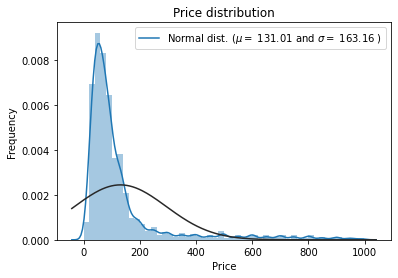

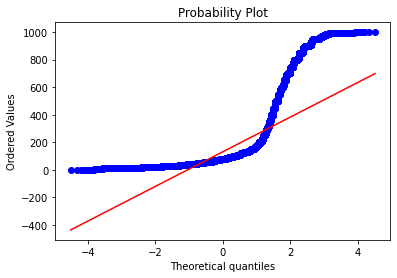

In [20]:
sns.distplot(df['Price'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show();


 mu = 92.36 and sigma = 7.27



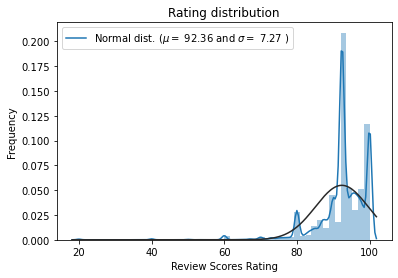

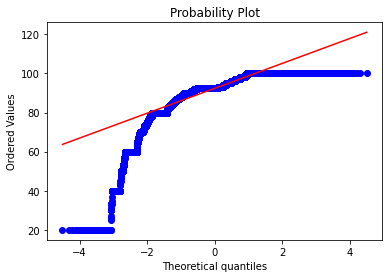

In [21]:
sns.distplot(df['Review Scores Rating'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Review Scores Rating'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rating distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Review Scores Rating'], plot=plt)
plt.show();


 mu = 4.46 and sigma = 0.83



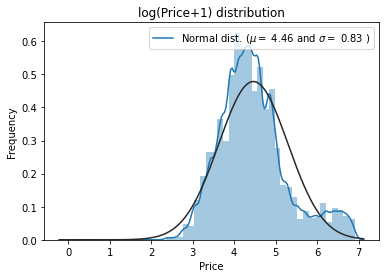

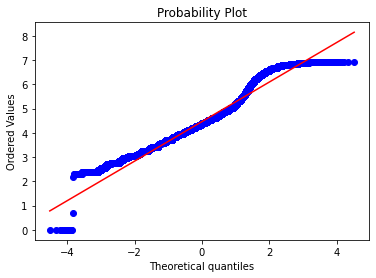

In [31]:
sns.distplot(np.log1p(df['Price']) , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df['Price']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(Price+1) distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(df['Price']), plot=plt)
plt.show();


 mu = 9.60 and sigma = 0.41



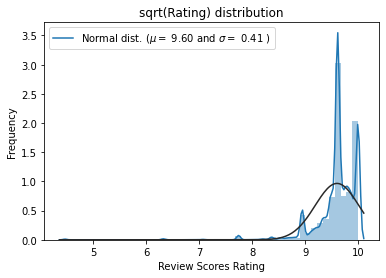

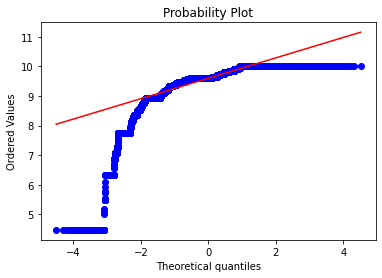

((array([-4.51082488, -4.31898621, -4.21487997, ...,  4.21487997,
          4.31898621,  4.51082488]),
  array([ 4.47213595,  4.47213595,  4.47213595, ..., 10.        ,
         10.        , 10.        ])),
 (0.34497700060146236, 9.601314175463104, 0.8352368366520851))

In [30]:
# sns.distplot(np.sqrt(df['Review Scores Rating']) , fit=norm);
# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(np.sqrt(df['Review Scores Rating']))
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('sqrt(Rating) distribution')
# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(np.sqrt(df['Review Scores Rating']), plot=plt)
# plt.show();

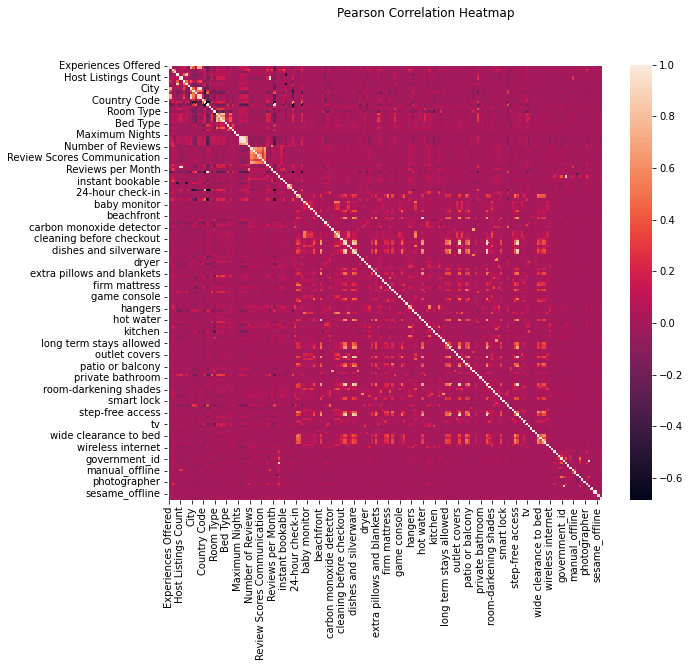

In [32]:
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['Price'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show();

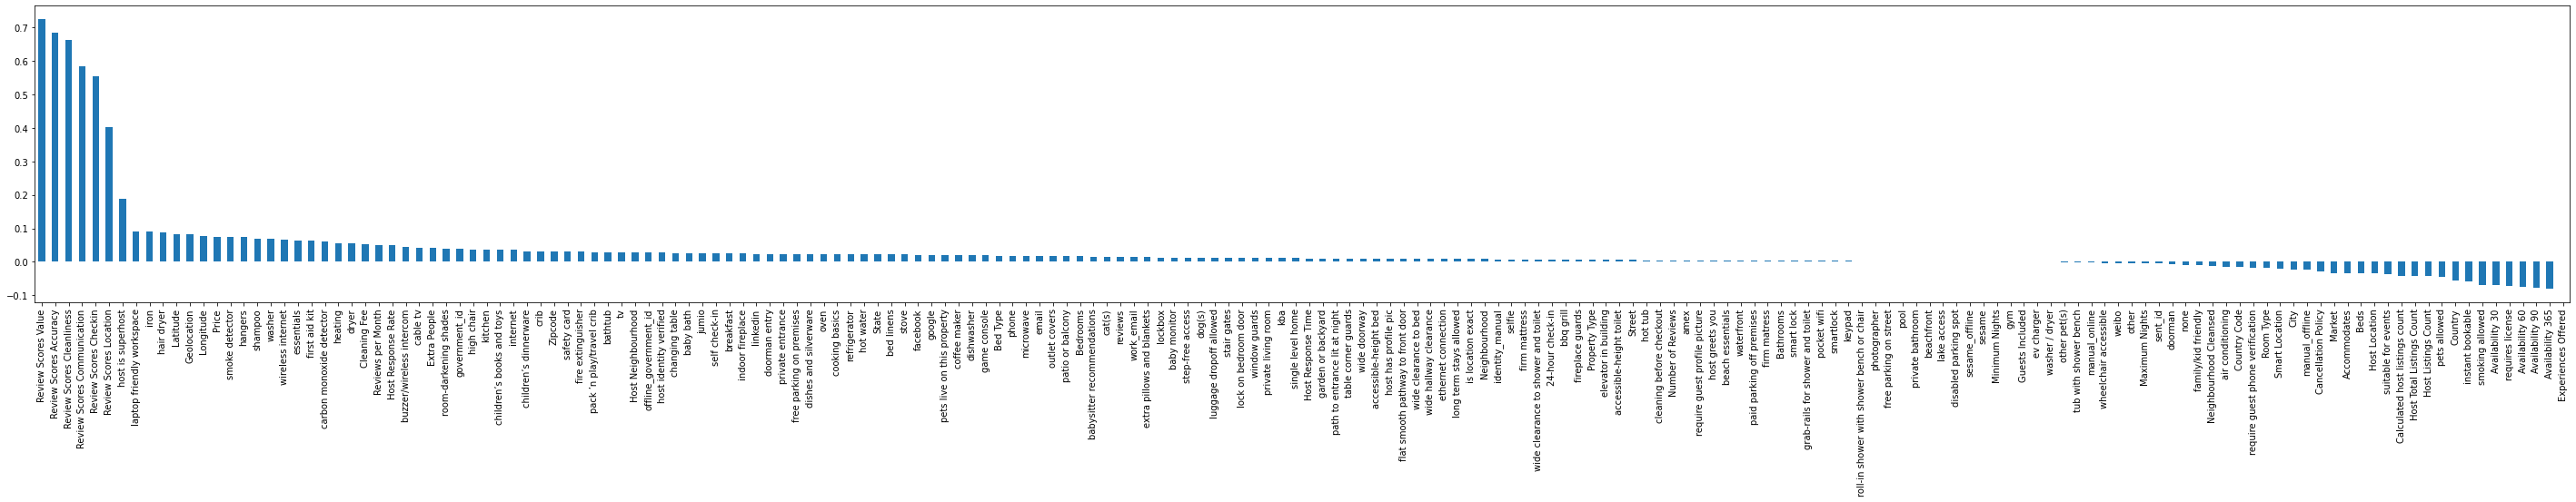

In [35]:
corr_with_sale_price = df.corr()["Review Scores Rating"].sort_values(ascending=False)
plt.figure(figsize=(50,6))
corr_with_sale_price.drop("Review Scores Rating").plot.bar()
plt.show();

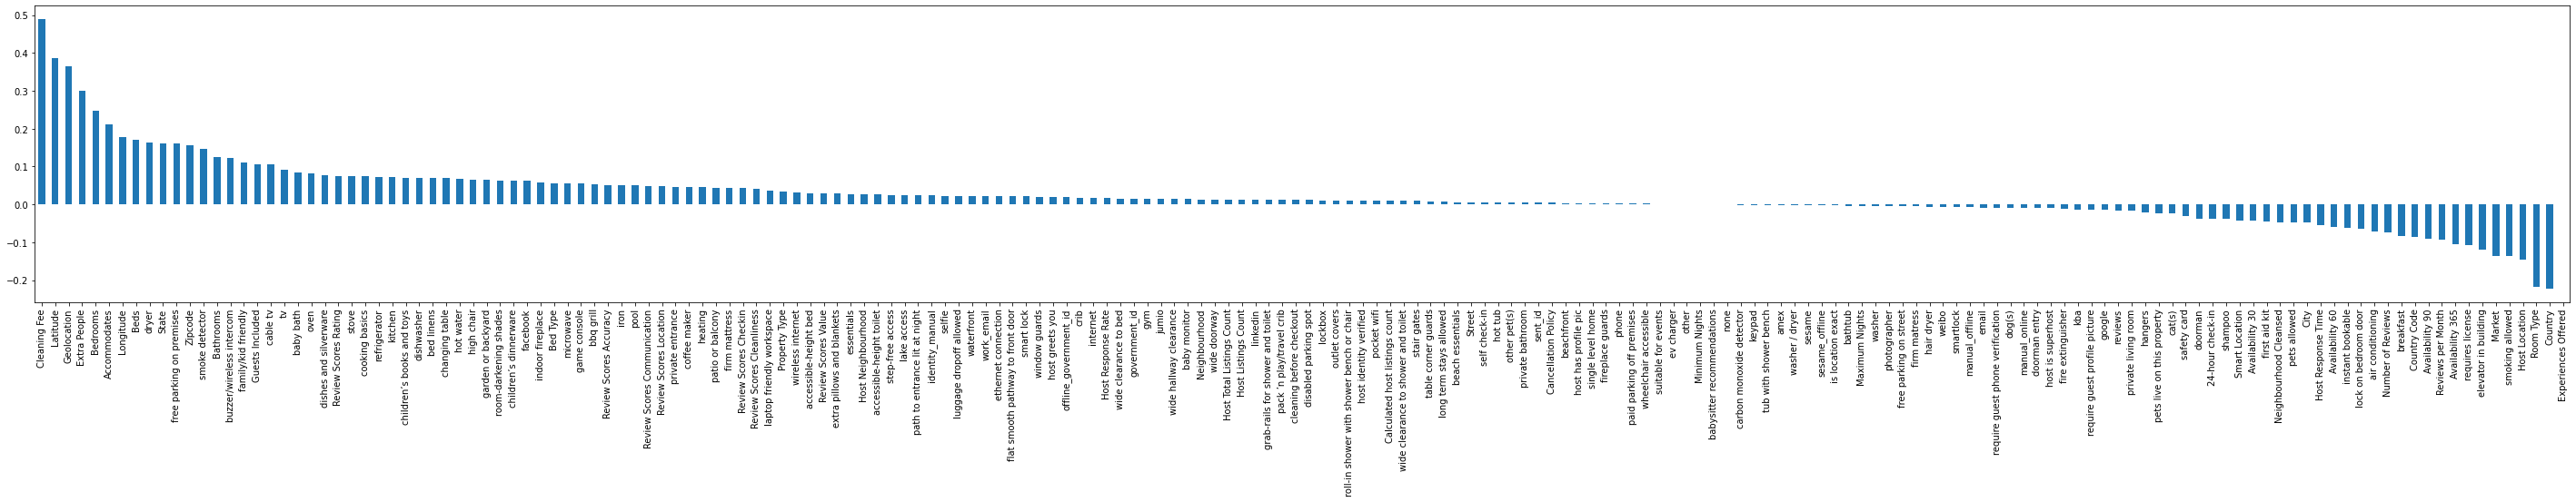

In [36]:
corr_with_sale_price = df.corr()["Price"].sort_values(ascending=False)
plt.figure(figsize=(50,6))
corr_with_sale_price.drop("Price").plot.bar()
plt.show();

In [37]:
df["Price"] = np.log1p(df["Price"])

#log transform skewed numeric features:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
print(skewed_feats)
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index


df[skewed_feats] = np.log1p(df[skewed_feats])

X, y = df.drop(['Price'], axis = 1), df['Price']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

Experiences Offered    0.000
Host Location          0.021
Host Response Time    -0.397
Host Response Rate    -4.087
Host Neighbourhood    -0.464
                       ...  
sent_id               22.488
sesame                77.202
sesame_offline        77.202
weibo                 46.771
work_email             3.160
Length: 189, dtype: float64


In [38]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=6, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)
               
cv_model.fit(X_train, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00000097
Optimal l1_ratio: 1.000
Number of iterations 276


In [39]:
y_train_pred = cv_model.predict(X_train)
y_pred = cv_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

Train r2 score:  0.4022625245404615
Test r2 score:  0.6205307674499387
Train RMSE: 0.5083
Test RMSE: 0.5148


159 features, reduction of 15.43%


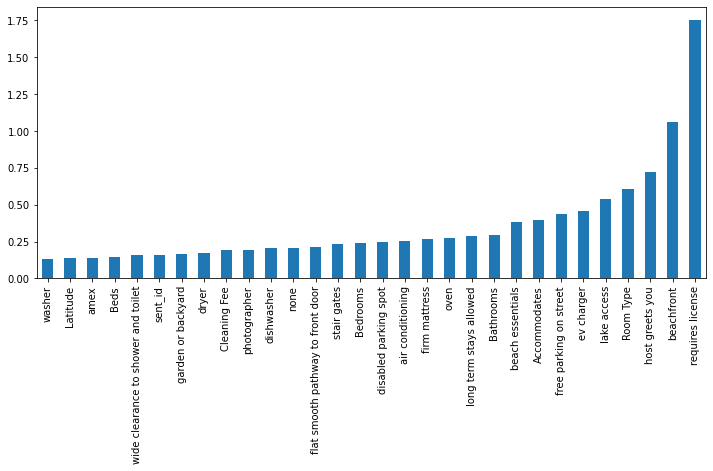

In [41]:
feature_importance = pd.Series(index = X_train.columns, data = np.abs(cv_model.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5));

In [42]:
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[10:24:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.681776554353217
Test r2 score:  0.7730690587805098
Train RMSE: 0.3935
Test RMSE: 0.3981


In [44]:
xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train)
y_pred2 = xgb_model2.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

[10:27:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.7828428115893369
Test r2 score:  0.8167486375614529
Train RMSE: 0.3471
Test RMSE: 0.3577


In [45]:
xgb_model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model3.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred3 = xgb_model3.predict(X_train)
y_pred3 = xgb_model3.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred3, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred3))
train_mse3 = mean_squared_error(y_train_pred3, y_train)
test_mse3 = mean_squared_error(y_pred3, y_test)
train_rmse3 = np.sqrt(train_mse3)
test_rmse3 = np.sqrt(test_mse3)
print('Train RMSE: %.4f' % train_rmse3)
print('Test RMSE: %.4f' % test_rmse3)

[10:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.7684208323146355
Test r2 score:  0.8103483476392569
Train RMSE: 0.3555
Test RMSE: 0.3639


In [47]:
#model 2 was the best among the 3 we tried, no further improvements
#now we rank the features in terms of importance/sensitivity
from collections import OrderedDict
features_price = OrderedDict(sorted(xgb_model2.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))
features_price

OrderedDict([('Latitude', 594),
             ('Longitude', 445),
             ('Zipcode', 408),
             ('Cleaning Fee', 349),
             ('Extra People', 258),
             ('Accommodates', 226),
             ('Bedrooms', 120),
             ('Guests Included', 114),
             ('Host Listings Count', 114),
             ('Calculated host listings count', 111),
             ('Neighbourhood Cleansed', 109),
             ('Bathrooms', 106),
             ('Street', 102),
             ('Minimum Nights', 101),
             ('Geolocation', 99),
             ('Room Type', 96),
             ('Reviews per Month', 96),
             ('Availability 365', 86),
             ('State', 80),
             ('Property Type', 80),
             ('Review Scores Location', 78),
             ('Number of Reviews', 74),
             ('Host Neighbourhood', 72),
             ('Availability 30', 65),
             ('Host Response Rate', 63),
             ('Availability 90', 61),
             ('City', 60),
  

In [52]:
most_relevant_features= list( dict((k, v) for k, v in xgb_model2.get_booster().get_fscore().items() if v >= 20).keys())
train_x=df[most_relevant_features]
train_y=df['Price']
X_train, X_test, y_train, y_test  = train_test_split(train_x, train_y, test_size = 0.2, random_state = 0)
xgb_model5 = XGBRegressor(n_estimators=1000)
xgb_model5.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred5 = xgb_model5.predict(X_train)
y_pred5 = xgb_model5.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred5, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred5))
train_mse5 = mean_squared_error(y_train_pred5, y_train)
test_mse5 = mean_squared_error(y_pred5, y_test)
train_rmse5 = np.sqrt(train_mse5)
test_rmse5 = np.sqrt(test_mse5)
print('Train RMSE: %.4f' % train_rmse5)
print('Test RMSE: %.4f' % test_rmse5)

[11:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.7884014501627227
Test r2 score:  0.8180213163041282
Train RMSE: 0.3437
Test RMSE: 0.3565


In [ ]:
#training on the most important features that have a very high impact yields slightly improved model accuracy - we'll go ahead with this one
